# Logistic Regression
* Logistic Regression should only be used for binary classification when your data meets certain assumptions:
    * Binary Target: The target must only have 2 possible classes
    * Linearity of Log Odds: Relationship between features and the log odds of the target is linear. This assumption is used to derive the sigmoid function
    $$ \text{logit}(p) = \mathbf{w}^T\mathbf{x} \\
    \log{\bigg(\frac{p}{1-p}\bigg)} = \mathbf{w}^T\mathbf{x} \\
    \frac{p}{1-p} = e^{\mathbf{w}^T\mathbf{x}} \\
    \frac{1-p}{p} = e^{-\mathbf{w}^T\mathbf{x}} \\
    \frac{1}{p} - 1 = e^{-\mathbf{w}^T\mathbf{x}} \\
    \frac{1}{p} = 1 + e^{-\mathbf{w}^T\mathbf{x}} \\
    p = \frac{1}{1 + e^{-\mathbf{w}^T\mathbf{x}}}$$
    * Independence of Errors: Independence of Errors: Errors (residuals) should be independent of each other. Patterns in a residual plot may suggest a lack of independence
    * No multicollinearity: Features should not be highly correlated with each other
    * Absence of Outliers: There should be no significant outliers that could heavily influence the results

In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

In [2]:
# Generate some example data
X, y = make_classification(n_samples = 10000, n_features = 2, n_informative = 2, n_redundant = 0, random_state = 42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(f"F1: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")

Accuracy: 0.88
F1: 0.88
Precision: 0.89
Recall: 0.87


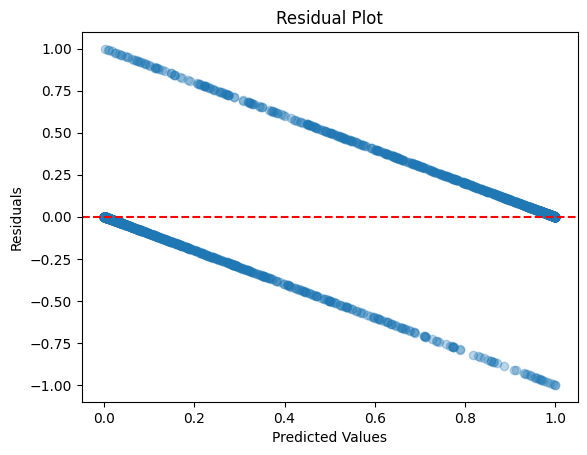

In [3]:
# Plot residuals
y_probs = model.predict_proba(X_test)[:,1]
residuals = y_test - y_probs
plt.scatter(y_probs, residuals, alpha = 0.3)
plt.axhline(y = 0, color = "red", linestyle = '--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

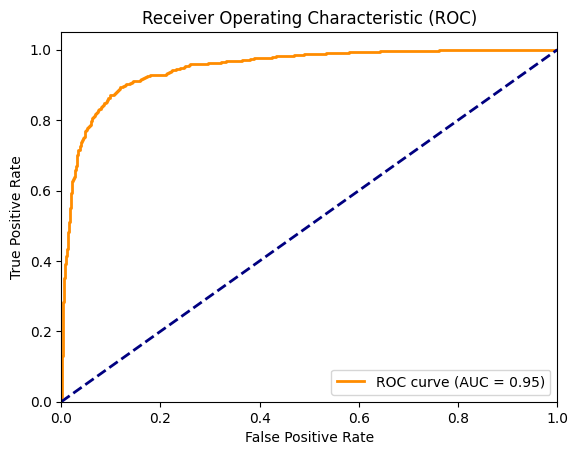

In [4]:
# Calculate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

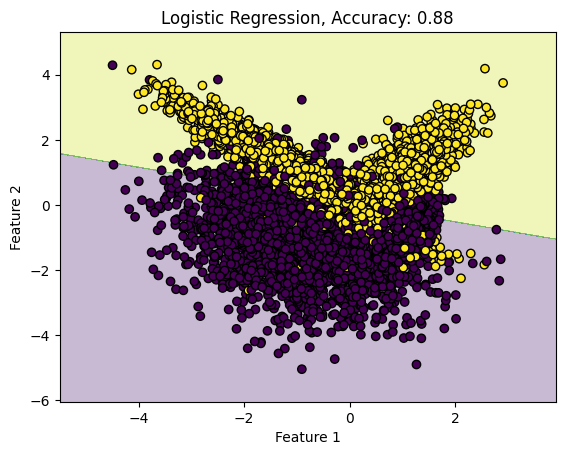

In [5]:
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolor='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Logistic Regression, Accuracy: {accuracy:.2f}')
plt.show()